# Машинное обучение, ВМК МГУ
## Практическое задание 5

### Общая информация
Дата выдачи: 16.12.2018

Мягкий дедлайн: 23:59MSK 21.12.2018

Жесткий дедлайн: 23:59MSK 31.12.2018

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py
* Ссылка на посылку в Яндекс.Контесте:[Посылка](https://contest.yandex.ru/contest/9963/run-report/18209785/)

В контест https://contest.yandex.ru/contest/9963/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__10

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [0]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [0]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

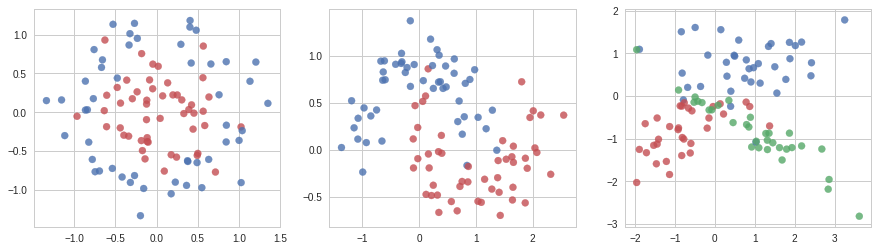

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [0]:
###Добавил параметр header - удобно
def plot_surface(clf, X, y, *, header):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    #plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    plt.title(header)

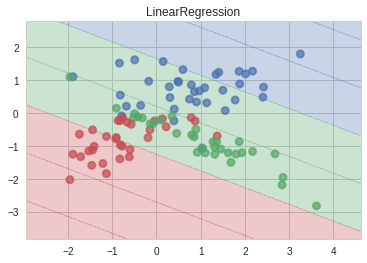

In [140]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y, header='LinearRegression')

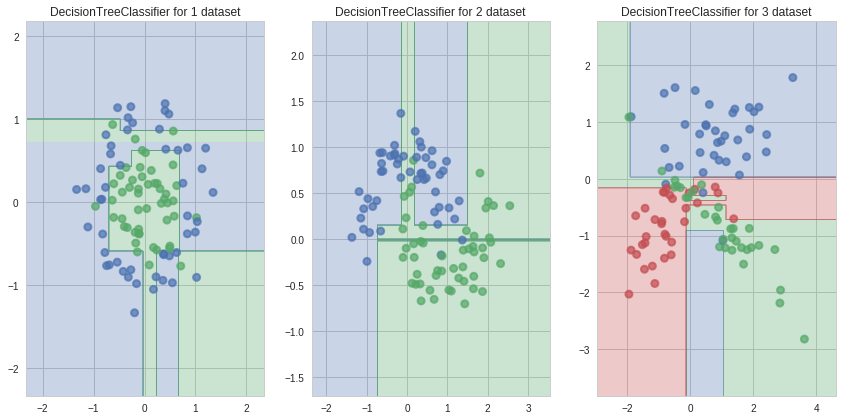

In [36]:
from sklearn.model_selection import train_test_split
accuracy_array = np.empty((3,2))
for i, (x, y) in enumerate(datasets):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=42)
  i_classif = DecisionTreeClassifier().fit(X_train, y_train)
  accuracy_array[i][0] = i_classif.score(X_train, y_train) 
  accuracy_array[i][1] = i_classif.score(X_test, y_test)
  plt.subplot(1, 3, i + 1)
  plt.subplots_adjust(right=2, bottom=0.2, top=1.5, hspace=0.6)
  plot_surface(i_classif, x, y, header="DecisionTreeClassifier for %d dataset" % (i + 1))

In [29]:
for i, j in enumerate(accuracy_array):
  print("Accuracy on train sample for DecisionTreeClassifier for %d dataset = %.4f" % (i + 1, j[0]))
  print("Accuracy on test sample for DecisionTreeClassifier for %d dataset = %.4f" % (i + 1, j[1]))
  print()

Accuracy on train sample for DecisionTreeClassifier for 1 dataset = 1.0000
Accuracy on test sample for DecisionTreeClassifier for 1 dataset = 0.7333

Accuracy on train sample for DecisionTreeClassifier for 2 dataset = 1.0000
Accuracy on test sample for DecisionTreeClassifier for 2 dataset = 0.8667

Accuracy on train sample for DecisionTreeClassifier for 3 dataset = 1.0000
Accuracy on test sample for DecisionTreeClassifier for 3 dataset = 0.8333



__Ответ:__ Деревья очень сильно переобучены, это видно из того, что accuracy равен 1 на каждом датасете. И это логично - на то они и рассчитаны в некоторых алгоритмах ансамблей)

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

### а) Третий датасет

#### 1.Провалидируем по параметру min_samples_leaf

In [0]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
scoring = {'RMSE': make_scorer(mean_squared_error), 'score': make_scorer(accuracy_score)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={'min_samples_leaf': range(1, 40)},
                  scoring=scoring,
                  refit="score",
                  return_train_score=True)
gs.fit(x, y)
results = gs.cv_results_

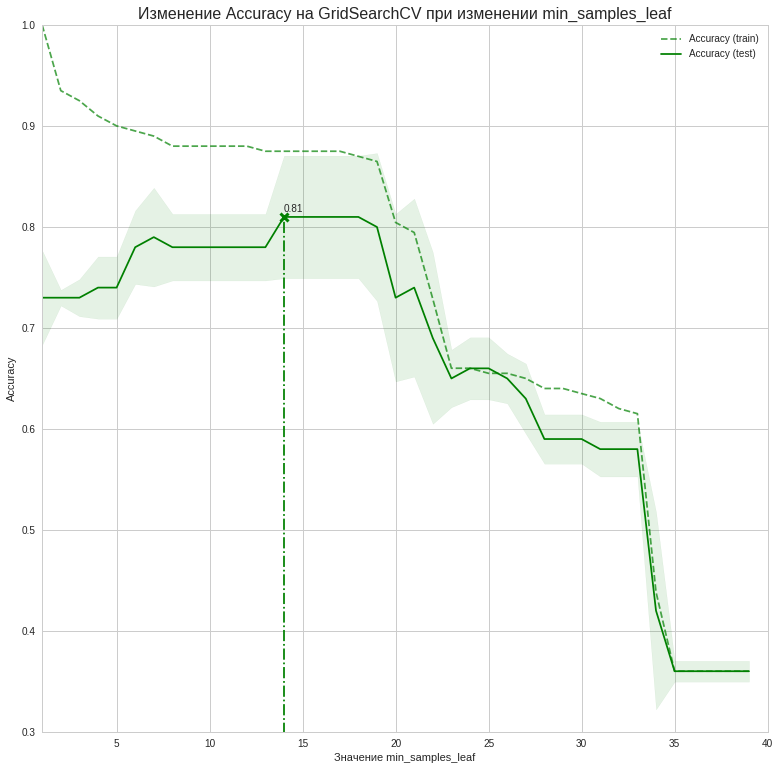

In [64]:
plt.figure(figsize=(13, 13))
plt.title("Изменение Accuracy на GridSearchCV при изменении min_samples_leaf",
          fontsize=16)

plt.xlabel("Значение min_samples_leaf")
plt.ylabel("Accuracy")

ax = plt.gca()
ax.set_xlim(1, 40)
ax.set_ylim(0.3, 1)

X_axis = np.array(results['param_min_samples_leaf'].data, dtype=float)

for color in ['g']:
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_score' % (sample)]
        sample_score_std = results['std_%s_score' % (sample)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="Accuracy (%s)" % (sample))

    best_index = np.nonzero(results['rank_test_score'] == 1)[0][0]
    best_score = results['mean_test_score'][best_index]

    # Здесь достигается максимум
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.show()

#### Выведем обучающую и тестовую ошибки (RMSE) и построим разделяющие поверхности:

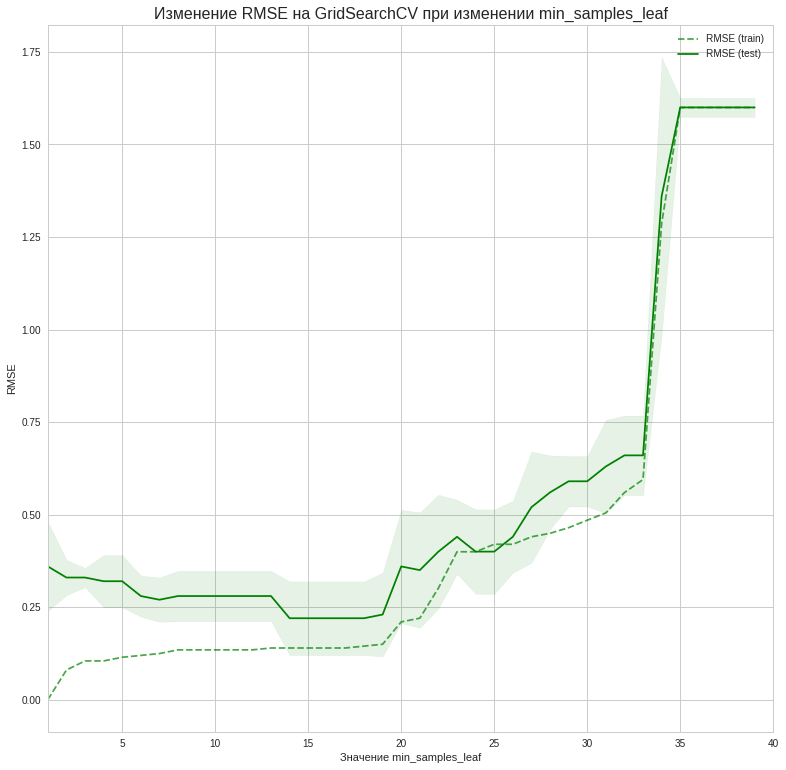

In [67]:
plt.figure(figsize=(13, 13))
plt.title("Изменение RMSE на GridSearchCV при изменении min_samples_leaf",
          fontsize=16)

plt.xlabel("Значение min_samples_leaf")
plt.ylabel("RMSE")

ax = plt.gca()
ax.set_xlim(1, 40)


X_axis = np.array(results['param_min_samples_leaf'].data, dtype=float)

for color in ['g']:
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_RMSE' % (sample)]
        sample_score_std = results['std_%s_RMSE' % (sample)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="RMSE (%s)" % (sample))

    best_index = np.nonzero(results['rank_test_RMSE'] == 1)[0][0]
    best_score = results['mean_test_RMSE'][best_index]
plt.legend(loc="best")
plt.show()


#### Разделяющие поверхности будем строить, обучаясь по всей выборке при соответствующих значениях гиперпараметра (построим для 6 значений)

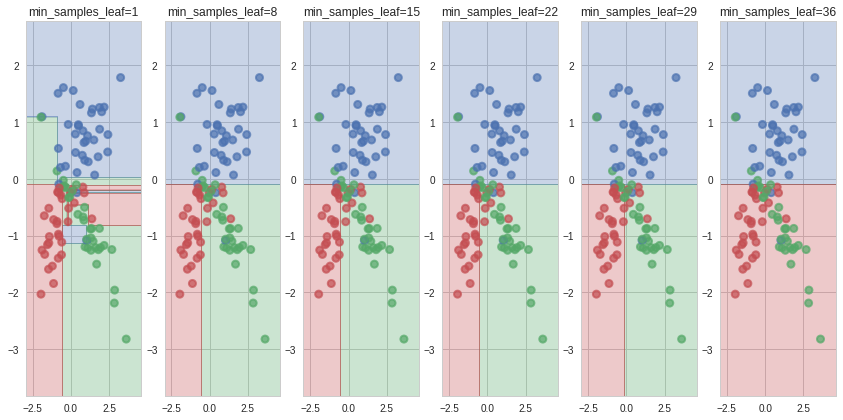

In [87]:
i = 0
for m_s_l in range(1,40,7):
  i_classif = DecisionTreeClassifier(random_state=42, min_samples_leaf=m_s_l).fit(x, y)
  plt.subplot(1, 6, i + 1)
  i += 1
  plt.subplots_adjust(right=2, bottom=0.2, top=1.5, hspace=0.6)
  plot_surface(i_classif, x, y, header="min_samples_leaf=%d" % (m_s_l))

#### 2. Провалидируемся по max_depth

In [0]:
gs1 = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={'max_depth': range(1, 11)},
                  scoring=scoring,
                  refit="score",
                  return_train_score=True)
gs1.fit(x, y)
results1 = gs1.cv_results_

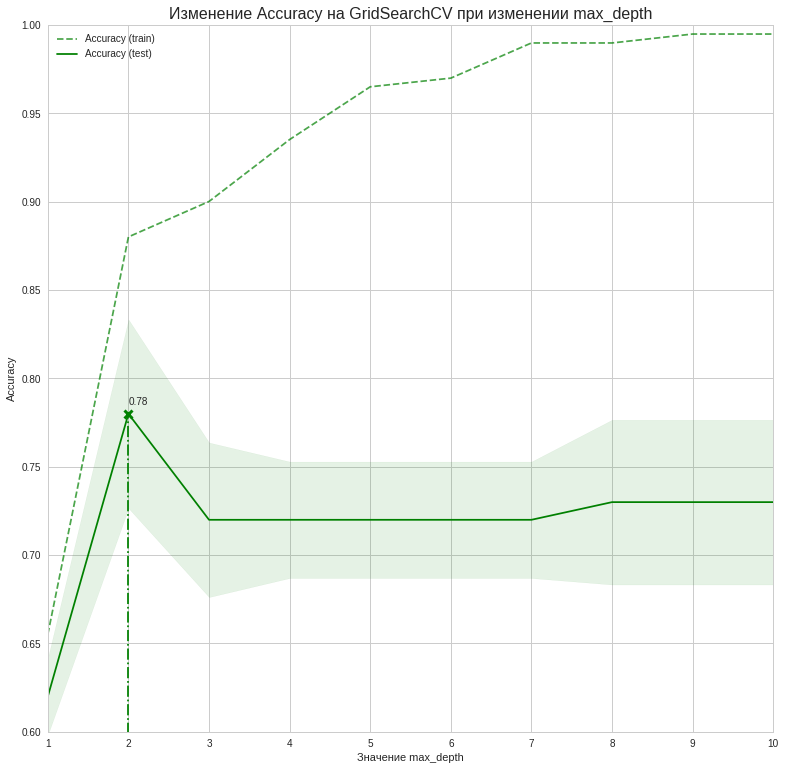

In [69]:
plt.figure(figsize=(13, 13))
plt.title("Изменение Accuracy на GridSearchCV при изменении max_depth",
          fontsize=16)

plt.xlabel("Значение max_depth")
plt.ylabel("Accuracy")

ax = plt.gca()
ax.set_xlim(1, 10)
ax.set_ylim(0.6, 1)

X_axis = np.array(results1['param_max_depth'].data, dtype=float)

for color in ['g']:
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results1['mean_%s_score' % (sample)]
        sample_score_std = results1['std_%s_score' % (sample)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="Accuracy (%s)" % (sample))

    best_index = np.nonzero(results1['rank_test_score'] == 1)[0][0]
    best_score = results1['mean_test_score'][best_index]

    # Здесь достигается максимум
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.show()

#### Выведем обучающую и тестовую ошибки (RMSE) и построим разделяющие поверхности:

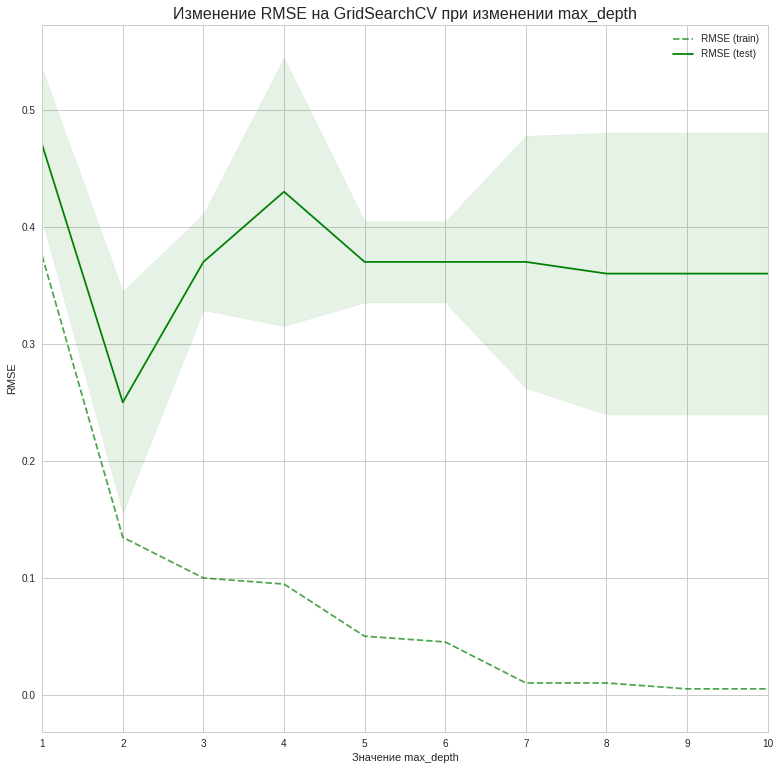

In [71]:
plt.figure(figsize=(13, 13))
plt.title("Изменение RMSE на GridSearchCV при изменении max_depth",
          fontsize=16)

plt.xlabel("Значение max_depth")
plt.ylabel("RMSE")

ax = plt.gca()
ax.set_xlim(1, 10)

X_axis = np.array(results1['param_max_depth'].data, dtype=float)

for color in ['g']:
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results1['mean_%s_RMSE' % (sample)]
        sample_score_std = results1['std_%s_RMSE' % (sample)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="RMSE (%s)" % (sample))

    best_index = np.nonzero(results1['rank_test_RMSE'] == 1)[0][0]
    best_score = results1['mean_test_RMSE'][best_index]

plt.legend(loc="best")
plt.show()

#### Опять довольно сложно сообразить, как строить при кросс-валидации разделяющие поверхности для тех же разбиений, что были сделаны в  GridSearchCV, поэтому построю для всей выборки 10 поверхностей, соответствующих параметрам

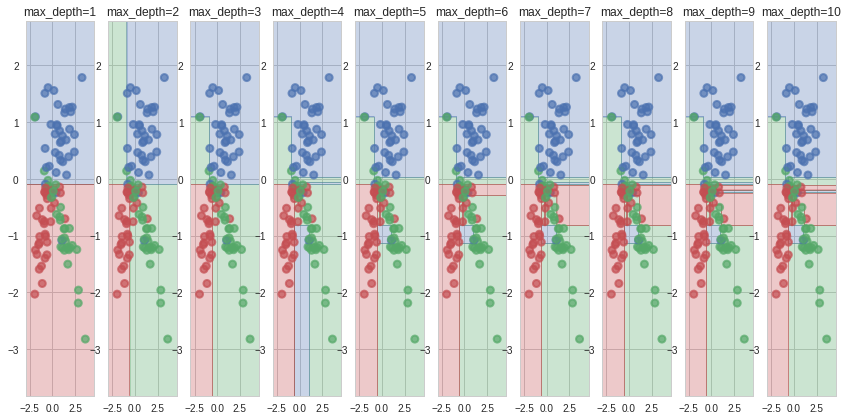

In [89]:
i = 0
for m_s_l in range(1,11):
  i_classif = DecisionTreeClassifier(random_state=42, max_depth=m_s_l).fit(x, y)
  plt.subplot(1, 10, i + 1)
  i += 1
  plt.subplots_adjust(right=2, bottom=0.2, top=1.5, hspace=0.6)
  plot_surface(i_classif, x, y, header="max_depth=%d" % (m_s_l))

#### б) Второй датасет

#### 1.Провалидируем по параметру min_samples_leaf

In [0]:
(x, y) = datasets[1]
gs.fit(x, y)
results = gs.cv_results_

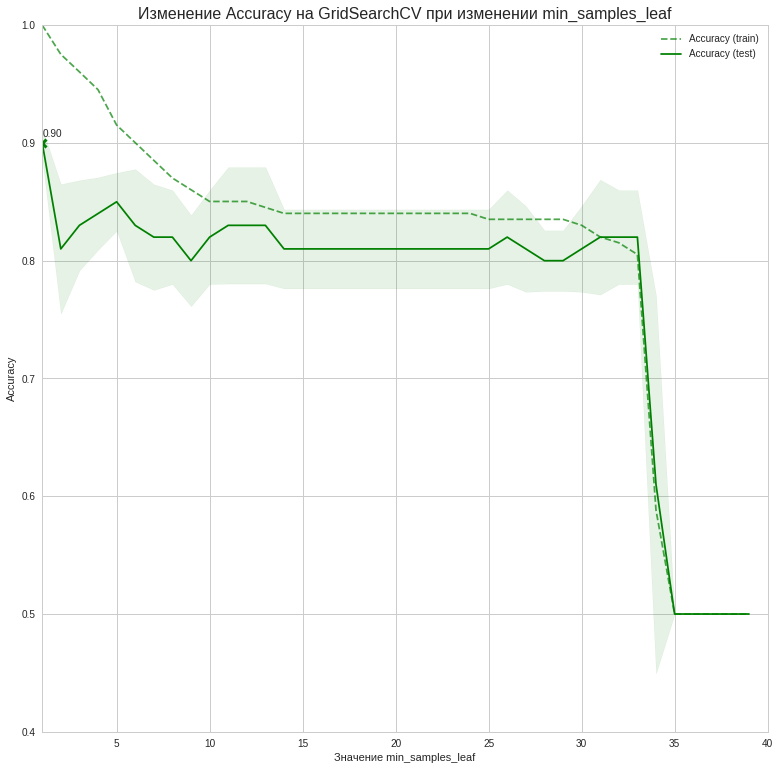

In [93]:
plt.figure(figsize=(13, 13))
plt.title("Изменение Accuracy на GridSearchCV при изменении min_samples_leaf",
          fontsize=16)

plt.xlabel("Значение min_samples_leaf")
plt.ylabel("Accuracy")

ax = plt.gca()
ax.set_xlim(1, 40)
ax.set_ylim(0.4, 1)

X_axis = np.array(results['param_min_samples_leaf'].data, dtype=float)

for color in ['g']:
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_score' % (sample)]
        sample_score_std = results['std_%s_score' % (sample)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="Accuracy (%s)" % (sample))

    best_index = np.nonzero(results['rank_test_score'] == 1)[0][0]
    best_score = results['mean_test_score'][best_index]

    # Здесь достигается максимум
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.show()

#### Выведем обучающую и тестовую ошибки (RMSE) и построим разделяющие поверхности:

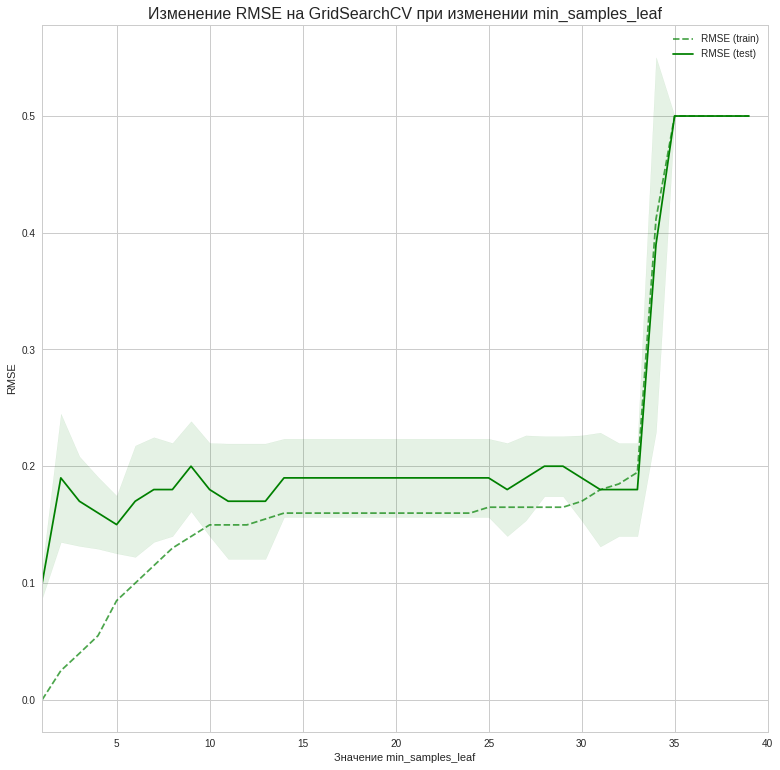

In [94]:
plt.figure(figsize=(13, 13))
plt.title("Изменение RMSE на GridSearchCV при изменении min_samples_leaf",
          fontsize=16)

plt.xlabel("Значение min_samples_leaf")
plt.ylabel("RMSE")

ax = plt.gca()
ax.set_xlim(1, 40)


X_axis = np.array(results['param_min_samples_leaf'].data, dtype=float)

for color in ['g']:
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_RMSE' % (sample)]
        sample_score_std = results['std_%s_RMSE' % (sample)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="RMSE (%s)" % (sample))

    best_index = np.nonzero(results['rank_test_RMSE'] == 1)[0][0]
    best_score = results['mean_test_RMSE'][best_index]
plt.legend(loc="best")
plt.show()


#### Разделяющие поверхности будем строить, обучаясь по всей выборке при соответствующих значениях гиперпараметра (построим для 6 значений)

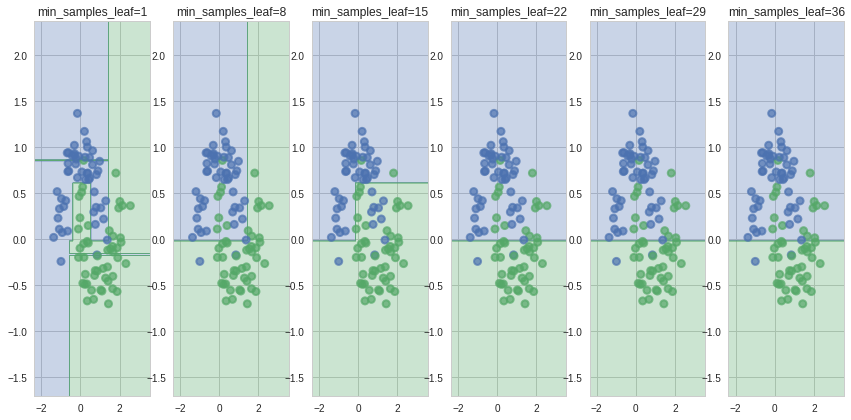

In [95]:
i = 0
for m_s_l in range(1,40,7):
  i_classif = DecisionTreeClassifier(random_state=42, min_samples_leaf=m_s_l).fit(x, y)
  plt.subplot(1, 6, i + 1)
  i += 1
  plt.subplots_adjust(right=2, bottom=0.2, top=1.5, hspace=0.6)
  plot_surface(i_classif, x, y, header="min_samples_leaf=%d" % (m_s_l))

#### 2. Провалидируемся по max_depth

In [0]:
gs1.fit(x, y)
results1 = gs1.cv_results_

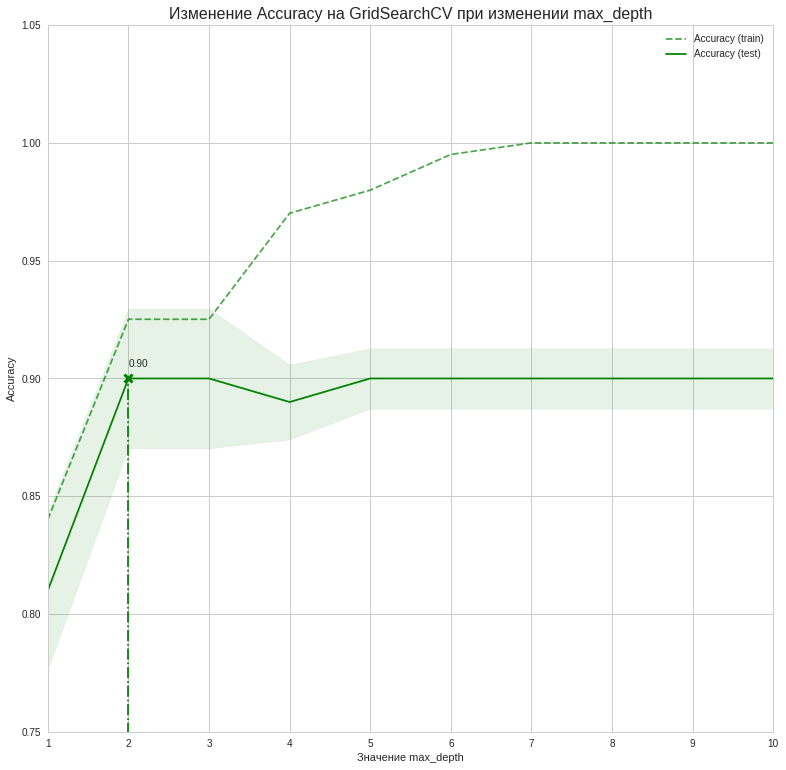

In [100]:
plt.figure(figsize=(13, 13))
plt.title("Изменение Accuracy на GridSearchCV при изменении max_depth",
          fontsize=16)

plt.xlabel("Значение max_depth")
plt.ylabel("Accuracy")

ax = plt.gca()
ax.set_xlim(1, 10)
ax.set_ylim(0.75, 1.05)

X_axis = np.array(results1['param_max_depth'].data, dtype=float)

for color in ['g']:
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results1['mean_%s_score' % (sample)]
        sample_score_std = results1['std_%s_score' % (sample)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="Accuracy (%s)" % (sample))

    best_index = np.nonzero(results1['rank_test_score'] == 1)[0][0]
    best_score = results1['mean_test_score'][best_index]

    # Здесь достигается максимум
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.show()

#### Выведем обучающую и тестовую ошибки (RMSE) и построим разделяющие поверхности:

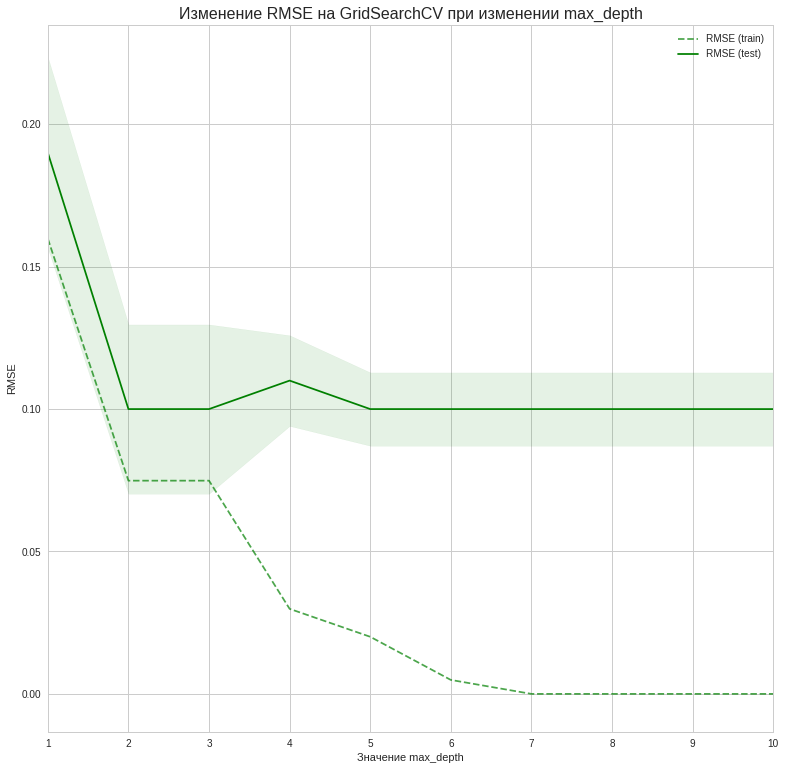

In [101]:
plt.figure(figsize=(13, 13))
plt.title("Изменение RMSE на GridSearchCV при изменении max_depth",
          fontsize=16)

plt.xlabel("Значение max_depth")
plt.ylabel("RMSE")

ax = plt.gca()
ax.set_xlim(1, 10)

X_axis = np.array(results1['param_max_depth'].data, dtype=float)

for color in ['g']:
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results1['mean_%s_RMSE' % (sample)]
        sample_score_std = results1['std_%s_RMSE' % (sample)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="RMSE (%s)" % (sample))

    best_index = np.nonzero(results1['rank_test_RMSE'] == 1)[0][0]
    best_score = results1['mean_test_RMSE'][best_index]

plt.legend(loc="best")
plt.show()

#### Опять довольно сложно сообразить, как строить при кросс-валидации разделяющие поверхности для тех же разбиений, что были сделаны в  GridSearchCV, поэтому построю для всей выборки 10 поверхностей, соответствующих параметрам

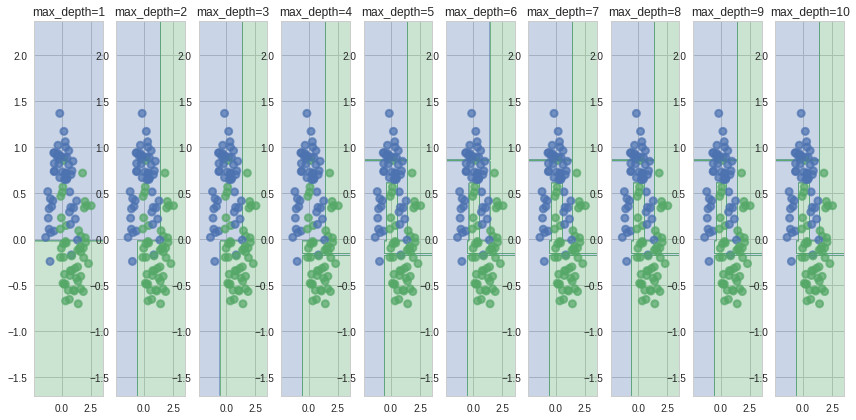

In [102]:
i = 0
for m_s_l in range(1,11):
  i_classif = DecisionTreeClassifier(random_state=42, max_depth=m_s_l).fit(x, y)
  plt.subplot(1, 10, i + 1)
  i += 1
  plt.subplots_adjust(right=2, bottom=0.2, top=1.5, hspace=0.6)
  plot_surface(i_classif, x, y, header="max_depth=%d" % (m_s_l))

### в)Первый датасет

#### 1.Провалидируем по параметру min_samples_leaf

In [0]:
(x,y) = datasets[0]
gs.fit(x, y)
results = gs.cv_results_

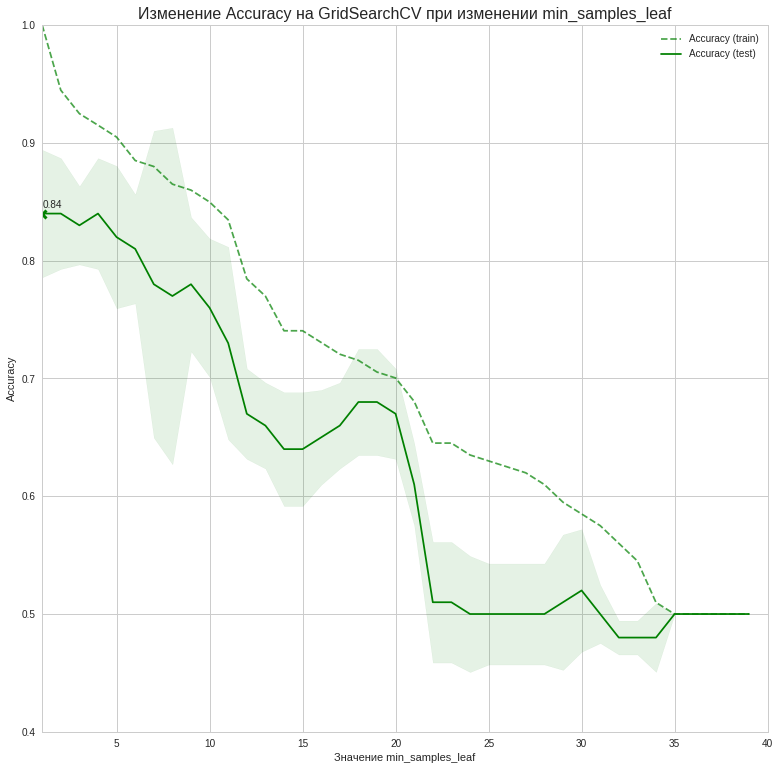

In [106]:
plt.figure(figsize=(13, 13))
plt.title("Изменение Accuracy на GridSearchCV при изменении min_samples_leaf",
          fontsize=16)

plt.xlabel("Значение min_samples_leaf")
plt.ylabel("Accuracy")

ax = plt.gca()
ax.set_xlim(1, 40)
ax.set_ylim(0.4, 1)

X_axis = np.array(results['param_min_samples_leaf'].data, dtype=float)

for color in ['g']:
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_score' % (sample)]
        sample_score_std = results['std_%s_score' % (sample)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="Accuracy (%s)" % (sample))

    best_index = np.nonzero(results['rank_test_score'] == 1)[0][0]
    best_score = results['mean_test_score'][best_index]

    # Здесь достигается максимум
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.show()

#### Выведем обучающую и тестовую ошибки (RMSE) и построим разделяющие поверхности:

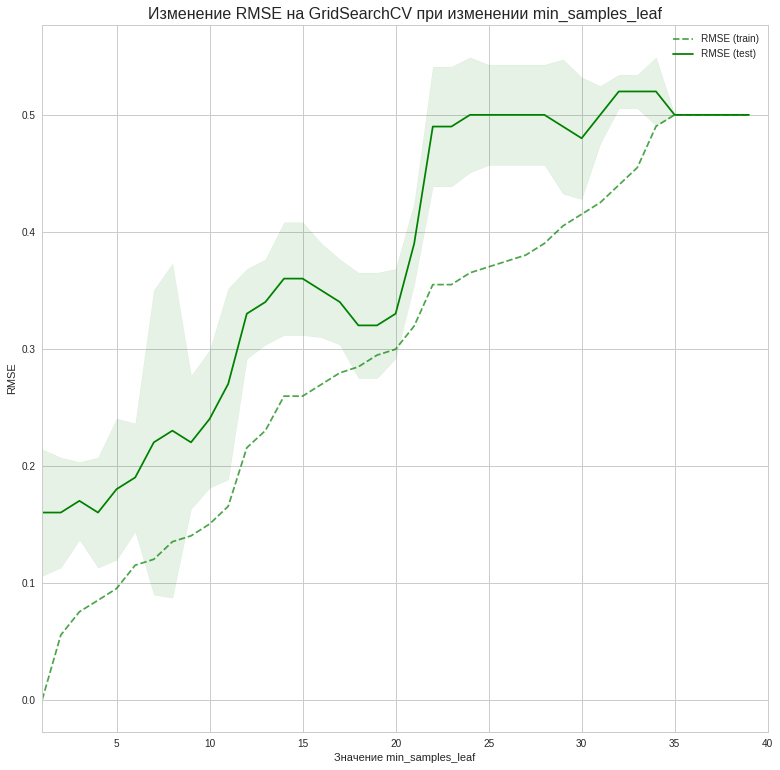

In [107]:
plt.figure(figsize=(13, 13))
plt.title("Изменение RMSE на GridSearchCV при изменении min_samples_leaf",
          fontsize=16)

plt.xlabel("Значение min_samples_leaf")
plt.ylabel("RMSE")

ax = plt.gca()
ax.set_xlim(1, 40)


X_axis = np.array(results['param_min_samples_leaf'].data, dtype=float)

for color in ['g']:
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_RMSE' % (sample)]
        sample_score_std = results['std_%s_RMSE' % (sample)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="RMSE (%s)" % (sample))

    best_index = np.nonzero(results['rank_test_RMSE'] == 1)[0][0]
    best_score = results['mean_test_RMSE'][best_index]
plt.legend(loc="best")
plt.show()


#### Разделяющие поверхности будем строить, обучаясь по всей выборке при соответствующих значениях гиперпараметра (построим для 6 значений)

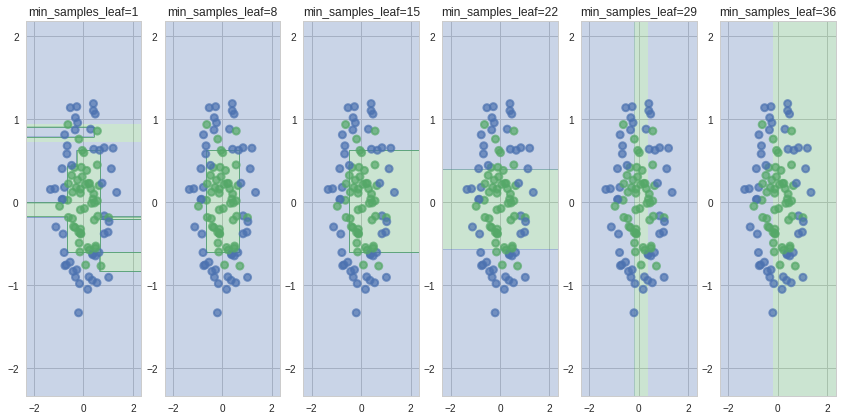

In [108]:
i = 0
for m_s_l in range(1,40,7):
  i_classif = DecisionTreeClassifier(random_state=42, min_samples_leaf=m_s_l).fit(x, y)
  plt.subplot(1, 6, i + 1)
  i += 1
  plt.subplots_adjust(right=2, bottom=0.2, top=1.5, hspace=0.6)
  plot_surface(i_classif, x, y, header="min_samples_leaf=%d" % (m_s_l))

#### 2. Провалидируемся по max_depth

In [0]:
gs1.fit(x, y)
results1 = gs1.cv_results_

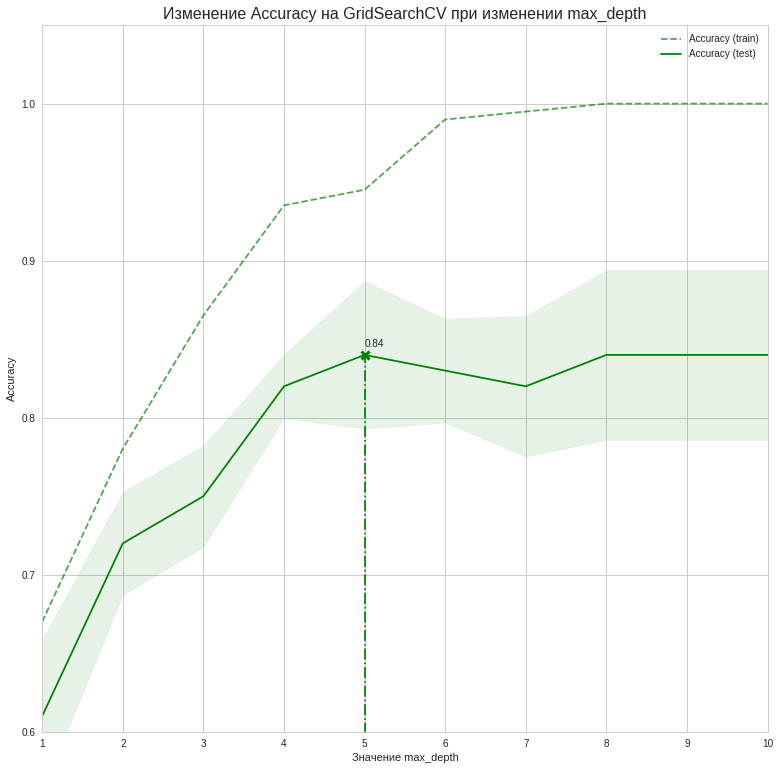

In [111]:
plt.figure(figsize=(13, 13))
plt.title("Изменение Accuracy на GridSearchCV при изменении max_depth",
          fontsize=16)

plt.xlabel("Значение max_depth")
plt.ylabel("Accuracy")

ax = plt.gca()
ax.set_xlim(1, 10)
ax.set_ylim(0.6, 1.05)

X_axis = np.array(results1['param_max_depth'].data, dtype=float)

for color in ['g']:
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results1['mean_%s_score' % (sample)]
        sample_score_std = results1['std_%s_score' % (sample)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="Accuracy (%s)" % (sample))

    best_index = np.nonzero(results1['rank_test_score'] == 1)[0][0]
    best_score = results1['mean_test_score'][best_index]

    # Здесь достигается максимум
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.show()

#### Выведем обучающую и тестовую ошибки (RMSE) и построим разделяющие поверхности:

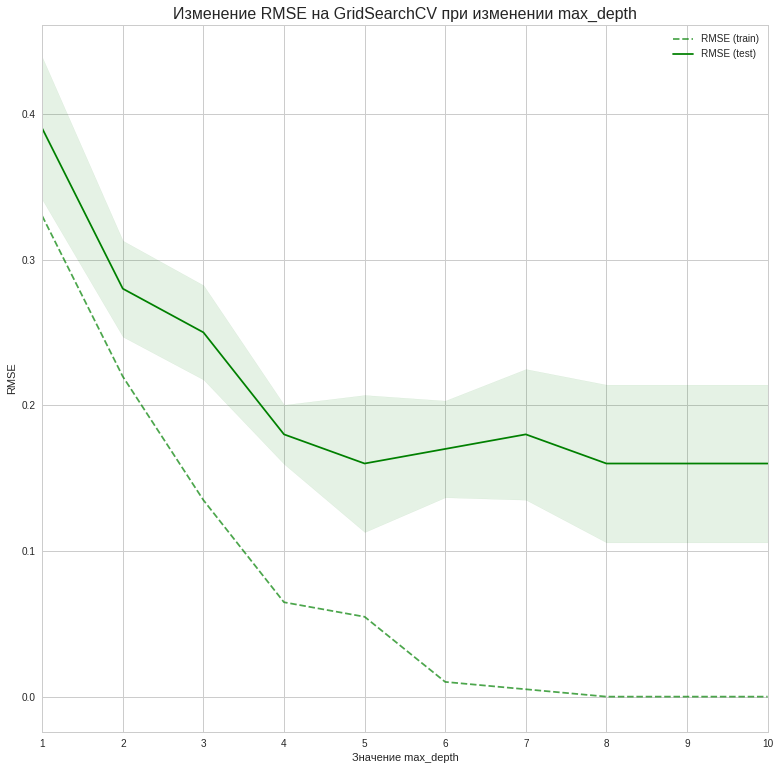

In [112]:
plt.figure(figsize=(13, 13))
plt.title("Изменение RMSE на GridSearchCV при изменении max_depth",
          fontsize=16)

plt.xlabel("Значение max_depth")
plt.ylabel("RMSE")

ax = plt.gca()
ax.set_xlim(1, 10)

X_axis = np.array(results1['param_max_depth'].data, dtype=float)

for color in ['g']:
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results1['mean_%s_RMSE' % (sample)]
        sample_score_std = results1['std_%s_RMSE' % (sample)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="RMSE (%s)" % (sample))

    best_index = np.nonzero(results1['rank_test_RMSE'] == 1)[0][0]
    best_score = results1['mean_test_RMSE'][best_index]

plt.legend(loc="best")
plt.show()

#### Опять довольно сложно сообразить, как строить при кросс-валидации разделяющие поверхности для тех же разбиений, что были сделаны в  GridSearchCV, поэтому построю для всей выборки 10 поверхностей, соответствующих параметрам

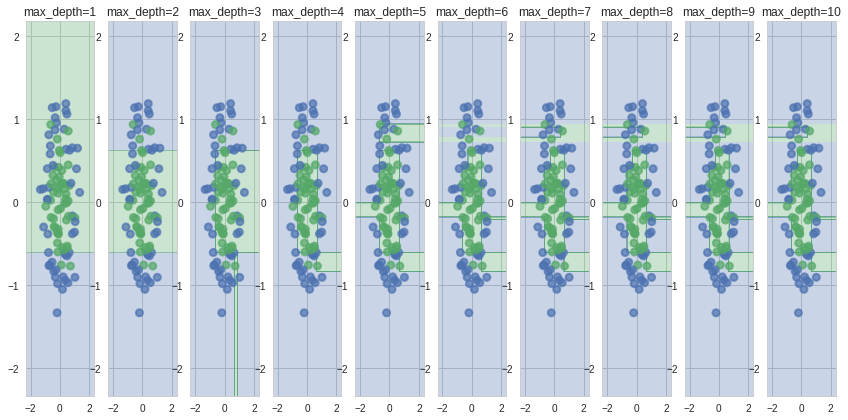

In [168]:
i = 0
for m_s_l in range(1,11):
  i_classif = DecisionTreeClassifier(random_state=42, max_depth=m_s_l).fit(x, y)
  plt.subplot(1, 10, (i+1))
  i += 1
  plt.subplots_adjust(right=2, bottom=0.2, top=1.5, hspace=0.6)
  plot_surface(i_classif, x, y, header="max_depth=%d" % (m_s_l))

__Ответ:__

ВСЕ РАССУЖДЕНИЯ МОЖНО СЧИТАТЬ НЕПРАВИЛЬНЫМИ, В КАКОЙ-ТО МЕРЕ, Т.К. Я НЕ СМОГ ПОСТРОИТЬ РАЗДЕЛЯЮЩИЕ ПОВЕРХНОСТИ ИМЕННО ДЛЯ ТЕХ РАЗБИЕНИЙ ВЫБОРКИ, КОТОРЫЕ ПОЛУЧАЛИСЬ В GridSearchCV, однако для всей выборки можно провести следующий анализ зависимости от гиперпараметров (точно правильными (с моей точки зрения) можно считать рассуждения об RMSE и accuracy, т.к. они получены для тех самых разбиений):
##### 3 датасет:
1)При изменении min_samples_leaf от 1 до 40, разделяющая поверхность разделяет объекты хуже и хуже, и, из графиков зависимости ошибки и accuracy от значений,  видно, что это происходит из-за недообучения модели, однако обобщающая способность не сильно страдает, поскольку средняя ошибка на тестовой выборке всё ещё не сильно отличается от ошибки на обучающей. Что приводит к виду разделяющей поверхности задачи бинарной классификации, хотя решалась задача для 3 классов. Это происходит из-за переизбытка числа объектов выборки, находящихся в вершинах, что упрощает структуру модели.
2) При изменении max_depth от 1 до 10 разделяющая поверхность улучшается, разделяя всё более точно, при этом видно, что, начиная со значения, равного 3, происходит переобучение модели, что приводит к потере обобщающей способности. Переобучение происходит из-за излишней глубины дерева.
##### 2 датасет:
1) Происходит такой же процесс, что и в 3 датасете при изменении этого же параметра. Однако, поскольку решалась задача бинарной классификации, то происходило не сильное недообучение (RMSE меняется на меньшее значение)
2)Происходит аналогичный процессу в 3 датасете при изменении того же параметра, только переобучение происходит в меньшей степени, что позволяет обобщающей способности не сильно упасть (на меньшее значение отличаются RMSE обучающей выборки и тестовой)
##### 1 датасет:
1) Здесь, казалось бы, происходят те же события – разделяющая поверхность хуже разделяет, но здесь наблюдается равномерное недообучение (увеличение RMSE), а не скачок при определённом значении, как в предыдущих датасетах. Так же немаловажным является факт того, что обобщающая способность здесь держится, в среднем, на более плохом уровне (видно из разрыва между RMSE обучающей и тестовой выборки). Есть только одно предположение – что это происходит из-за самого датасета и несоответствия выбранной нами модели для решения этой задачи
2) Здесь так же очень похожа ситуация на предыдущие датасеты, но, опять же, переобучение происходит не так резко, и обобщающая способность проявляется хуже, чем в 3 и 2 датасете

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [0]:
import numpy as np
from collections import Counter


def _gini(sorted_feature_vec):
    N = len(sorted_feature_vec)
    N_1 = sum(sorted_feature_vec)

    def H_R(p1, p0):
        return 1 - p1**2 - p0**2

    amnt_of_obj_in_l_node = np.arange(1, N)
    amnt_of_1_obj_in_l_node = sorted_feature_vec[:-1].cumsum()
    pl_1 = amnt_of_1_obj_in_l_node / amnt_of_obj_in_l_node

    amnt_of_obj_in_r_node = amnt_of_obj_in_l_node[::-1]
    amnt_of_1_obj_in_r_node = N_1 - amnt_of_1_obj_in_l_node
    pr_1 = amnt_of_1_obj_in_r_node / amnt_of_obj_in_r_node

    return -((amnt_of_obj_in_l_node / N) * H_R(pl_1, 1 - pl_1) +
             (amnt_of_obj_in_r_node / N) * H_R(pr_1, 1 - pr_1))


def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух соседних (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    # thr = np.convolve(sorted(feature_vector), [0.5,0.5], 'valid')
    mask = np.argsort(feature_vector)
    shl_feature_vec = feature_vector[mask][1:]
    shr_feature_vec = feature_vector[mask][:-1]
    unique_mask = shl_feature_vec != shr_feature_vec

    thr = ((shl_feature_vec + shr_feature_vec) / 2)[unique_mask]
    ginis = _gini(target_vector[mask])[unique_mask]
    return thr, ginis, thr[np.argmax(ginis)], max(ginis)



__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import pandas as pd
students = pd.read_csv('/content/gdrive/My Drive/MMRO5/students.csv')
students.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [0]:
target = students[' UNS'].values
data = students.drop(' UNS', axis=1)

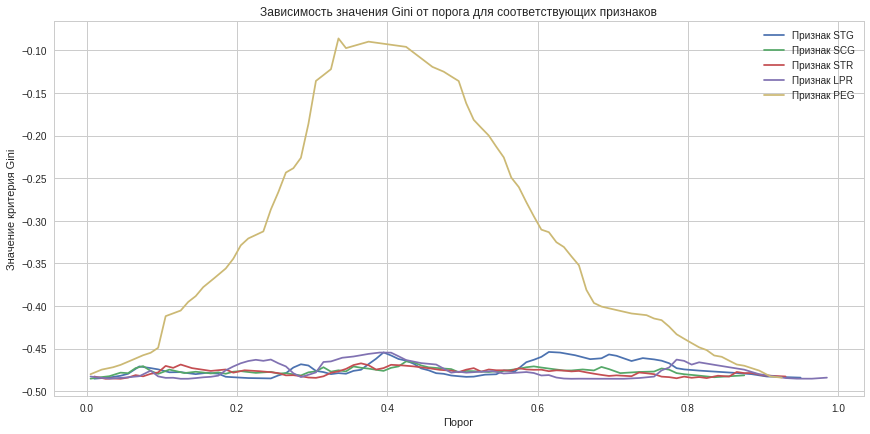

In [44]:
for i, k in enumerate(data.columns):
  thri, gi, _, _ = find_best_split(data.values[:, i], target)
  plt.plot(thri, gi, color="C%d"%i, label="Признак %s"%k)
plt.xlabel('Порог')
plt.ylabel('Значение критерия Gini')
plt.title("Зависимость значения Gini от порога для соответствующих признаков")
plt.legend()
plt.subplots_adjust(right=2, bottom=0.2, top=1.5, hspace=0.6)
#plt.tight_layout()
plt.show()

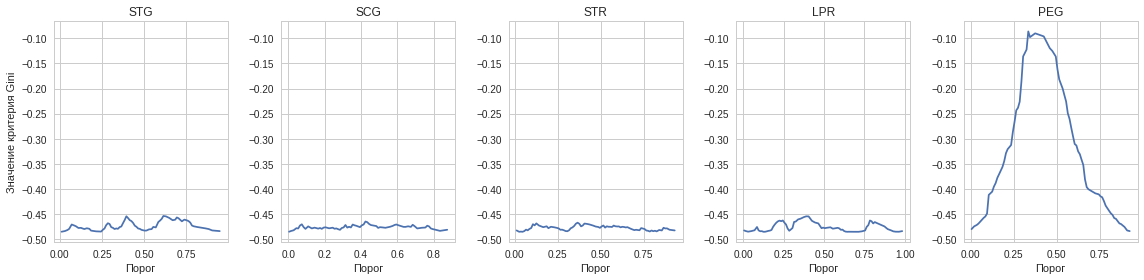

In [42]:
#Или такой график лучше?
fig = plt.figure(figsize=(16, 4))
axis = [None]
N = len(data.columns)
axis[0] = plt.subplot(1, N, 1, sharey=axis[0])
th, gi, _, _ = find_best_split(data.values[:, 0], target)
plt.plot(th, gi)
plt.title(data.columns[0])
plt.ylabel('Значение критерия Gini')
plt.xlabel('Порог')
for i, col in enumerate(data.columns):
    if i:
        plt.subplot(1, len(data.columns), i + 1, sharey=axis[0])
        th, gi, _, _ = find_best_split(data.values[:, i], target)
        plt.plot(th, gi)
        plt.title(col)
        plt.xlabel('Порог')
fig.tight_layout()

Формат графика нашёл в документации, а потом увидел такой же у одногруппника, но ссылку уже не нашёл

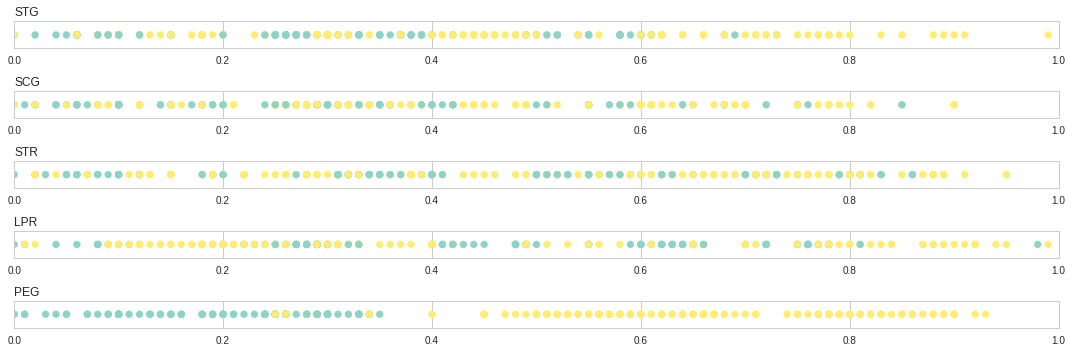

In [55]:
fig = plt.figure(figsize=(15, 5))
for i, col in enumerate(data.columns):
    plt.subplot(len(data.columns), 1, i + 1)
    plt.scatter(data.iloc[:, i], np.zeros(data.shape[0]), c=target, cmap='Set3')    
    plt.yticks([])
    plt.xlim(0, 1)
    plt.title(col, loc='left', fontsize=12)
plt.tight_layout()

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** И исходя из кривых Джини, и из scatter-графика, стоит выбрать признак PEG для разделения на 2 поддерева. Почти идеально делится выборка у признаков, которые имеют график с резким скачком или не очень резким, но скачком. Разделение не считаю возможным, если график колеблется около одной и той же величины, т.е. отклонение от среднего значения функции мало

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [0]:
from sklearn.base import BaseEstimator

# В результате проведения экспериментов, понял, что надо отнаследоваться от
# BaseEstimator, чтобы были методы get_params и не только
class DecisionTree(BaseEstimator):
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        # Здесь максимально неудобная ошибка - казалось бы, всё нормально с
        # названием, но cross_val_score говорит, что feature_types=None, поэтому
        # убрал _
        self.feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        # Ох уж это равенство:
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        # Сомнения, что range правильный - оправдались, т.к. шли с 1
        for feature in range(sub_X.shape[1]):
            feature_type = self.feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    # Здесь было перепутано деление
                    ratio[key] = current_click / current_count
                # Тут, как мне кажется, хотели бы просто отсортировать keys()
                # по значениям величин, а не сортировать элементы, исходя из их
                # величины:
                sorted_categories = sorted(ratio.keys(), key=lambda x: ratio[x])
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError
            # Вот тут хотели проверить, как и в начале _fit_node, только на
            # равенство, чтобы продолжить цикл
            if np.all(feature_vector == feature_vector[0]):
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                # Эммм, опечатка с большой буквой?)
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            # most_common не возвращает то, что нам хотелось бы ->
            # индексирование забыли
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self.feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self.feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        # Забытое отрицание в sub_y
        self._fit_node(sub_X[np.logical_not(split)],
                       sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]
        elif node["type"] == "nonterminal":
            type_of_feature = self.feature_types[node["feature_split"]]
            if type_of_feature == "real":
                if x[node["feature_split"]] < node["threshold"]:
                    return self._predict_node(x, node["left_child"])
                else:
                    return self._predict_node(x, node["right_child"])
            elif type_of_feature == "categorical":
                if x[node["feature_split"]] in node["categories_split"]:
                    return self._predict_node(x, node["left_child"])
                else:
                    return self._predict_node(x, node["right_child"])

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [6]:
mushrooms = pd.read_csv('/content/gdrive/My Drive/MMRO5/mushrooms.csv', header=None)
mushrooms.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Брал идею LabelEncoder для Pandas [отсюда](https://chrisalbon.com/machine_learning/preprocessing_structured_data/convert_pandas_categorical_column_into_integers_for_scikit-learn/)

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

mush = pd.DataFrame({ c:LabelEncoder().fit_transform(mushrooms[c]) for c in mushrooms.columns},
                    columns=mushrooms.columns)
X_train, X_test, y_train, y_test = train_test_split(mush.drop(columns=0), mush[0], test_size=0.5)
tree = DecisionTree(['real' for c in X_train.columns])
tree.fit(X_train.values, y_train.values)
print('Accuracy on train= %.4f' % accuracy_score(y_train, tree.predict(X_train.values)))
print('Accuracy on test= %.4f' % accuracy_score(y_test, tree.predict(X_test.values)))

Accuracy on train= 1.0000
Accuracy on test= 1.0000


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

ttt = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data')
ttte = pd.DataFrame({ c:LabelEncoder().fit_transform(ttt[c]) for c in ttt.columns},
                    columns=ttt.columns) 

car = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')
car.unacc = ((car.unacc == 'good') | (car.unacc == 'vgood')).astype(int)
care = pd.DataFrame({ c:LabelEncoder().fit_transform(cars[c]) for c in cars.columns},
                    columns=cars.columns) 

nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')
nursery.recommend = ((nursery.recommend == 'priority') |
                     (nursery.recommend  == 'very_recom') |
                     (nursery.recommend  == 'spec_prior')).astype(int)
nurserye = pd.DataFrame({ c:LabelEncoder().fit_transform(nursery[c]) for c in nursery.columns},
                    columns=nursery.columns) 

In [0]:
answer = pd.DataFrame(
    columns=['Real', 'Categorical', 'Real&OneHot', 'DecisionTreeClassifier'], 
    index=['mushrooms', 'ttt', 'car', 'nursery', 'ttt_predict_o'], data=0)
answer.columns.name = 'Average Accuracy'

In [0]:
X, y = mush.iloc[:, 1:], mush.iloc[:, 0]
XE = OneHotEncoder(sparse=False).fit_transform(X)
answer.loc['mushrooms', 'Real'] = cross_val_score(DecisionTree(['real' for _ in X.columns]), X.values, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()
answer.loc['mushrooms', 'Categorical'] = cross_val_score(DecisionTree(['categorical' for _ in X.columns]), X.values, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()
answer.loc['mushrooms', 'Real&OneHot'] = cross_val_score(DecisionTree(['real' for _ in range(XE.shape[1])]), XE, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()
answer.loc['mushrooms', 'DecisionTreeClassifier'] = cross_val_score(DecisionTreeClassifier(), X.values, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()

In [0]:
X, y = ttte.iloc[:, :-1], ttte.iloc[:, -1]
XE = OneHotEncoder(sparse=False).fit_transform(X)
answer.loc['ttt', 'Real'] = cross_val_score(DecisionTree(['real' for _ in X.columns]), X.values, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()
answer.loc['ttt', 'Categorical'] = cross_val_score(DecisionTree(['categorical' for _ in X.columns]), X.values, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()
answer.loc['ttt', 'Real&OneHot'] = cross_val_score(DecisionTree(['real' for _ in range(XE.shape[1])]), XE, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()
answer.loc['ttt', 'DecisionTreeClassifier'] = cross_val_score(DecisionTreeClassifier(), X.values, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()

In [0]:
X, y = care.iloc[:, :-1], care.iloc[:, -1]
XE = OneHotEncoder(sparse=False).fit_transform(X)
answer.loc['car', 'Real'] = cross_val_score(DecisionTree(['real' for _ in X.columns]), X.values, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()
answer.loc['car', 'Categorical'] = cross_val_score(DecisionTree(['categorical' for _ in X.columns]), X.values, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()
answer.loc['car', 'Real&OneHot'] = cross_val_score(DecisionTree(['real' for _ in range(XE.shape[1])]), XE, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()
answer.loc['car', 'DecisionTreeClassifier'] = cross_val_score(DecisionTreeClassifier(), X.values, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()

In [0]:
X, y = nurserye.iloc[:, :-1], nurserye.iloc[:, -1]
XE = OneHotEncoder(sparse=False).fit_transform(X)
answer.loc['nursery', 'Real'] = cross_val_score(DecisionTree(['real' for _ in X.columns]), X.values, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()
answer.loc['nursery', 'Categorical'] = cross_val_score(DecisionTree(['categorical' for _ in X.columns]), X.values, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()
answer.loc['nursery', 'Real&OneHot'] = cross_val_score(DecisionTree(['real' for _ in range(XE.shape[1])]), XE, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()
answer.loc['nursery', 'DecisionTreeClassifier'] = cross_val_score(DecisionTreeClassifier(), X.values, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()

In [168]:
answer

Average Accuracy,Real,Categorical,Real&OneHot,DecisionTreeClassifier
mushrooms,0.999261,1.000000,0.999631,0.962593
ttt,0.462697,0.549265,0.553520,0.759111
car,0.942600,0.967519,0.921767,0.940374
nursery,0.999846,0.999923,0.999769,0.999846
ttt_predict_o,0.000000,0.000000,0.000000,0.000000


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** В результатах экспериментов можно заметить, что, в основном, алгоритмы, считающие все признаки категориальными, показывают лучшую точность предсказаний. Это происходит из-за того, как мы реализовали алгоритм так, чтобы категориальные признаки задавали нам разделяющие переходы в дереве. Т.е., как и написано в лекциях, мы стараемся создать дерево, которое создавало бы листью для каждого подмножества из категориальных признаков. Очевидно, что, не используя напрямую наш алгоритм, но упорядочив признаки, можно получить результаты, которые отличаются на меньшее значение, чем тем, которые указаны для других алгоритмов в таблице (к вопросу о том, что можно сделать).



#### Это можно проследить, например, на датасете car

In [169]:
care.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,0
1,3,3,0,0,2,0,0
2,3,3,0,0,1,1,0
3,3,3,0,0,1,2,0
4,3,3,0,0,1,0,0


Видно, что small, low, 2.1 и 2 плохо упорядочены, но степень упорядоченности влияет лишь на малую степень. Интересно, почему наш алгоритм даёт плохую точность на ttt...

In [137]:
ttte.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,2,2,2,2,1,1,1,2,1,1
1,2,2,2,2,1,1,1,1,2,1
2,2,2,2,2,1,1,1,0,0,1
3,2,2,2,2,1,1,0,1,0,1
4,2,2,2,2,1,1,0,0,1,1


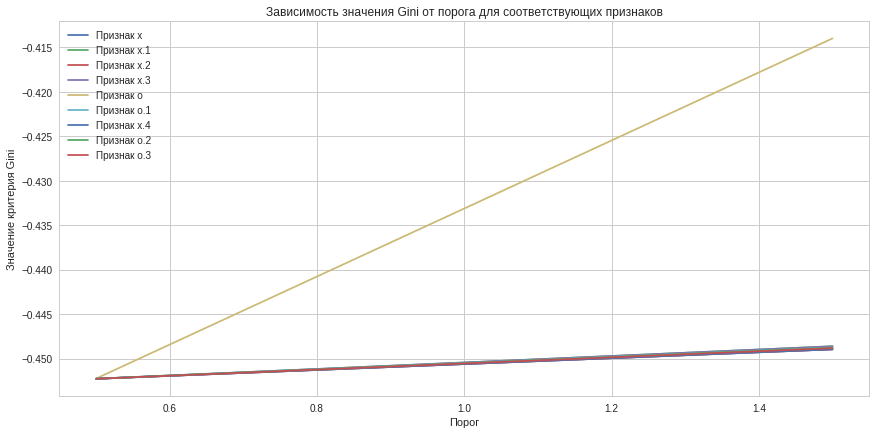

In [138]:
target = ttte['positive'].values
data = ttte.drop('positive', axis=1)
for i, k in enumerate(data.columns):
  thri, gi, _, _ = find_best_split(data.values[:, i], target)
  plt.plot(thri, gi, color="C%d"%i, label="Признак %s"%k)
plt.xlabel('Порог')
plt.ylabel('Значение критерия Gini')
plt.title("Зависимость значения Gini от порога для соответствующих признаков")
plt.legend()
plt.subplots_adjust(right=2, bottom=0.2, top=1.5, hspace=0.6)
#plt.tight_layout()
plt.show()

#### Ага, кажется, есть предположение... У датасета tic-tac-toe нет хорошего признака, по которому можно разделить выборку, в отличии от других:

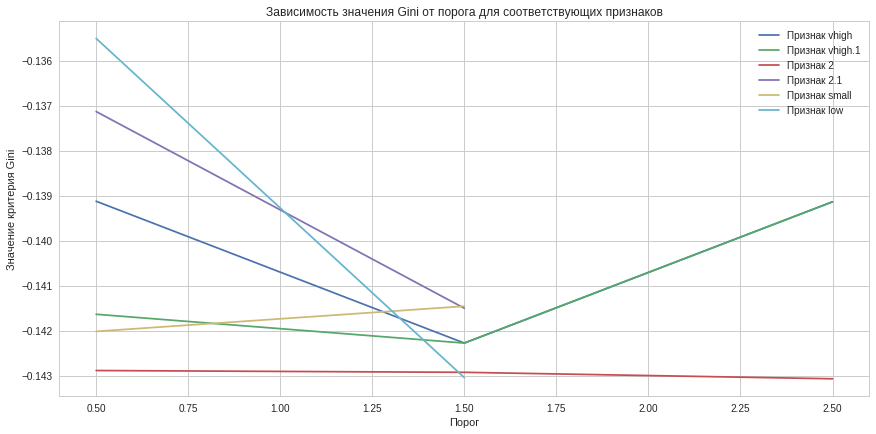

In [140]:
target = care['unacc'].values
data = care.drop('unacc', axis=1)
for i, k in enumerate(data.columns):
  thri, gi, _, _ = find_best_split(data.values[:, i], target)
  plt.plot(thri, gi, color="C%d"%i, label="Признак %s"%k)
plt.xlabel('Порог')
plt.ylabel('Значение критерия Gini')
plt.title("Зависимость значения Gini от порога для соответствующих признаков")
plt.legend()
plt.subplots_adjust(right=2, bottom=0.2, top=1.5, hspace=0.6)
#plt.tight_layout()
plt.show()

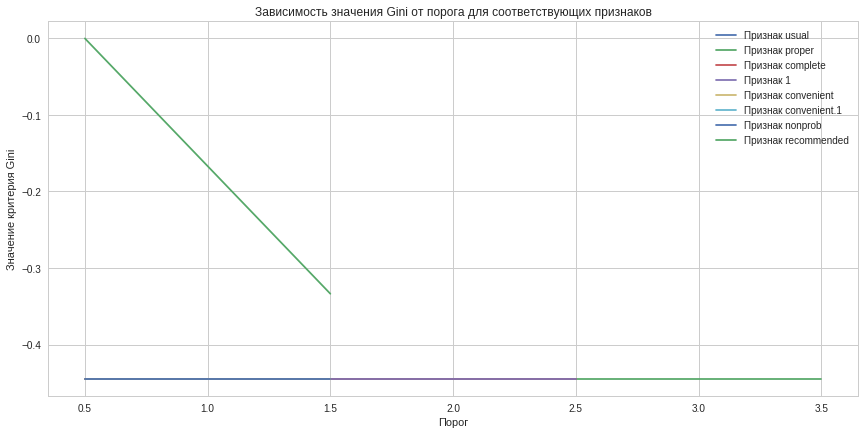

In [142]:
target = nurserye['recommend'].values
data = nurserye.drop('recommend', axis=1)
for i, k in enumerate(data.columns):
  thri, gi, _, _ = find_best_split(data.values[:, i], target)
  plt.plot(thri, gi, color="C%d"%i, label="Признак %s"%k)
plt.xlabel('Порог')
plt.ylabel('Значение критерия Gini')
plt.title("Зависимость значения Gini от порога для соответствующих признаков")
plt.legend()
plt.subplots_adjust(right=2, bottom=0.2, top=1.5, hspace=0.6)
#plt.tight_layout()
plt.show()

#### Можно кое-что попробовать...

In [0]:
target = ttte['o']
data = ttte.drop('o', axis=1)
X, y = data, target
XE = OneHotEncoder(sparse=False).fit_transform(X)
answer.loc['ttt_predict_o', 'Real'] = cross_val_score(DecisionTree(['real' for _ in X.columns]), X.values, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()
answer.loc['ttt_predict_o', 'Categorical'] = cross_val_score(DecisionTree(['categorical' for _ in X.columns]), X.values, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()
answer.loc['ttt_predict_o', 'Real&OneHot'] = cross_val_score(DecisionTree(['real' for _ in range(XE.shape[1])]), XE, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()
answer.loc['ttt_predict_o', 'DecisionTreeClassifier'] = cross_val_score(DecisionTreeClassifier(), X.values, y.values,
                                           scoring=make_scorer(accuracy_score), cv=10).mean()

In [171]:
answer

Average Accuracy,Real,Categorical,Real&OneHot,DecisionTreeClassifier
mushrooms,0.999261,1.000000,0.999631,0.962593
ttt,0.462697,0.549265,0.553520,0.759111
car,0.942600,0.967519,0.921767,0.940374
nursery,0.999846,0.999923,0.999769,0.999846
ttt_predict_o,0.539024,0.610362,0.576853,0.481336


Мдаа, шалость удалась, конечно, но sklearn стал явно хуже работать. Однако, всё равно, видно, что Categorial лучше)

При выполнении задания пользовался:
[ссылка1](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
[ссылка2](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
[ссылка3](https://github.com/scikit-learn/scikit-learn/blob/7389dba/sklearn/model_selection/_validation.py#L276)
[ссылка4](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
[ссылка5](http://qaru.site/questions/15351/truth-value-of-a-series-is-ambiguous-use-aempty-abool-aitem-aany-or-aall)
[ссылка6](https://github.com/esokolov/ml-course-hse/blob/master/2018-fall/lecture-notes/lecture07-trees.pdf)
[ссылка7](http://www.machinelearning.ru/wiki/index.php?title=%D0%9E%D0%B1%D0%BE%D0%B1%D1%89%D0%B0%D1%8E%D1%89%D0%B0%D1%8F_%D1%81%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D0%BD%D0%BE%D1%81%D1%82%D1%8C)
[ссылка8](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
[ссылка9](https://dyakonov.org/2018/04/25/%D1%81%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D0%B5-bias-%D0%B8-%D1%80%D0%B0%D0%B7%D0%B1%D1%80%D0%BE%D1%81-variance-%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8-%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82/)
[ссылка10](https://scikit-learn.org/stable/modules/grid_search.html#multimetric-grid-search)
[ссылка11](https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py)
[ссылка12](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
[ссылка13](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score)